In [4]:
# Import basic data science packages
import numpy as np
import pandas as pd

# Import plotting packages
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Import tensorflow packages
import tensorflow as tf
import tensorflow_datasets as tfds

# Import various keras tools
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Import tools for model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
roc_curve, roc_auc_score, classification_report, precision_score, recall_score

In [113]:
import pcamlib as pc

To get started with this dataset, I adapted the code from this [article](https://geertlitjens.nl/post/getting-started-with-camelyon/) written by Geert Litjens, one of the authors of the dataset.

I used his code for the `train_pipeline`, `valid_pipeline`, and `test_pipeline`, which load the train, validation, and test sets and prepare them for modelling. I also make use of his function `convert_sample`. This function extracts each image and its corresponding label from the dataset, converts each image to a TensorFlow `tf.float32` datatype, then performs one-hot encoding on the labels and converts them to `tf.float32` as well.

In [5]:
def convert_sample(sample):
    image, label = sample['image'], sample['label']  
    image = tf.image.convert_image_dtype(image, tf.float32)
    label = tf.one_hot(label, 2, dtype=tf.float32)
    return image, label

In [6]:
pcam, pcam_info = tfds.load("patch_camelyon", with_info=True)
print(pcam_info)

tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_path='/Users/jaredlauer/tensorflow_datasets/patch_camelyon/2.0.0',
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable

In [7]:
train_pipeline = pcam['train'].map(convert_sample, num_parallel_calls=8).shuffle(1024).repeat().batch(64).prefetch(2)

valid_pipeline = pcam['validation'].map(convert_sample, num_parallel_calls=8).repeat().batch(128).prefetch(2)

test_pipeline = pcam['test'].map(convert_sample, num_parallel_calls=8).batch(128).prefetch(2)

In [8]:
pcam_train_iterator = pcam['train'].__iter__()

In [9]:
pcam_train_batch = pcam_train_iterator.get_next()

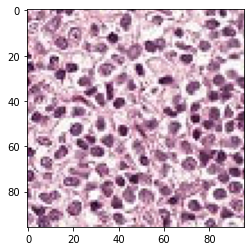

In [10]:
plt.imshow(pcam_train_batch['image'])

In [11]:
int(pcam_train_batch['label'])

0

In [71]:
train_iterator = train_pipeline.__iter__()
train_batch = train_iterator.get_next()

In [68]:
# Get the first 64 images
print(train_batch[0][1])

tf.Tensor(
[[[0.74509805 0.45098042 0.8078432 ]
  [0.62352943 0.36078432 0.7254902 ]
  [0.6117647  0.39607847 0.7607844 ]
  ...
  [0.60784316 0.43529415 0.8196079 ]
  [0.33333334 0.19215688 0.58431375]
  [0.2784314  0.16078432 0.5529412 ]]

 [[0.8745099  0.5803922  0.93725497]
  [0.6901961  0.41960788 0.77647066]
  [0.45882356 0.227451   0.59607846]
  ...
  [0.5176471  0.34117648 0.7137255 ]
  [0.38823533 0.23137257 0.6117647 ]
  [0.3921569  0.2509804  0.63529414]]

 [[0.6039216  0.32941177 0.6784314 ]
  [0.6039216  0.33333334 0.69803923]
  [0.52156866 0.2627451  0.6431373 ]
  ...
  [0.627451   0.43529415 0.7843138 ]
  [0.5411765  0.35686275 0.7176471 ]
  [0.654902   0.48627454 0.8470589 ]]

 ...

 [[0.5294118  0.34117648 0.6784314 ]
  [0.4039216  0.20784315 0.54901963]
  [0.60784316 0.3921569  0.7568628 ]
  ...
  [0.4431373  0.23137257 0.5764706 ]
  [0.6431373  0.42352945 0.7725491 ]
  [0.6313726  0.40000004 0.7607844 ]]

 [[0.5764706  0.40784317 0.7568628 ]
  [0.4431373  0.25882354 0

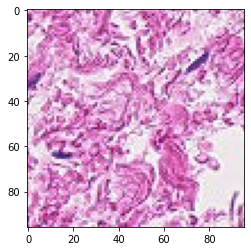

In [73]:
plt.imshow(train_batch[0][15])

In [14]:
# Get the first 64 image labels (one-hot encoded)
print(train_batch[1])

tf.Tensor(
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]], shape=(64, 2), dtype=float32)


I also used Geert Litjens CNN layer architecture as a starting point. It resembles a VGG16 architecture because it has three sets of two Convolutional layers followed by a single Max Pooling layer, followed by a Flattening layer and two Dense layers before the final Dense layer which outputs the class predictions. I kept the layer parameters the same as his example.

I changed the optimizer to `Adam` from `SGD` simply because he provided multiple hyperparameters to go along with it, and I wanted to experiment with that on my own. I also added additional Dropout layers after each convolutional layer, because the first iteration of the model started overfitting quickly after the first epoch and the validation accuracy didn't improve beyond 80%.

In [35]:
# Instantiate model object
cnn = Sequential()

# Images are 96x96 px, in RGB so there are 3 channels
image_shape = (96, 96, 3)

# Adding convultional layers to the model 
# It was important to add dropout layers after each convolutional layer to reduce overfitting
cnn.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=image_shape))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='valid'))
cnn.add(Dropout(0.2))

# Add a max pool layer to reduce the dimensions of the feature maps
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))

# Repeating this architecture two more times
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
     
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))

# Flatten the data to prepare for dense layers
cnn.add(Flatten())
        
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.2))

# Final Dense layer to make class predictions
cnn.add(Dense(2, activation='softmax'))
        
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 94, 94, 16)        448       
_________________________________________________________________
dropout_16 (Dropout)         (None, 94, 94, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 92, 92, 16)        2320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 92, 92, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 44, 44, 32)        4640      
_________________________________________________________________
dropout_18 (Dropout)         (None, 44, 44, 32)       

In [36]:
# For comparison, this commented line is the original optimizer used in the article:
# sgd_opt = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
cnn.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Add early stop callback to prevent the model from overfitting, or running too long
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

In [38]:
%%time
history = cnn.fit(train_pipeline,
                   validation_data=valid_pipeline,
                   verbose=1, epochs=15, steps_per_epoch=4096, validation_steps=256,
                   callbacks=[early_stop])

Epoch 1/15
4096/4096 [==============================] - 1913s 467ms/step - loss: 0.3643 - accuracy: 0.8419 - val_loss: 0.4072 - val_accuracy: 0.8196
Epoch 2/15
4096/4096 [==============================] - 1897s 463ms/step - loss: 0.3130 - accuracy: 0.8681 - val_loss: 0.3444 - val_accuracy: 0.8465
Epoch 3/15
4096/4096 [==============================] - 1888s 461ms/step - loss: 0.2877 - accuracy: 0.8816 - val_loss: 0.4092 - val_accuracy: 0.8138
Epoch 4/15
4096/4096 [==============================] - 1887s 461ms/step - loss: 0.2710 - accuracy: 0.8889 - val_loss: 0.3492 - val_accuracy: 0.8408
Epoch 5/15
4096/4096 [==============================] - 1881s 459ms/step - loss: 0.2555 - accuracy: 0.8969 - val_loss: 0.3043 - val_accuracy: 0.8638
Epoch 6/15
4096/4096 [==============================] - 1888s 461ms/step - loss: 0.2459 - accuracy: 0.9017 - val_loss: 0.3171 - val_accuracy: 0.8583
Epoch 7/15
4096/4096 [==============================] - 1884s 460ms/step - loss: 0.2380 - accuracy: 0.9058

In [51]:
# Save the fitted model to a file
cnn.save('cnn1')

In [62]:
# Save the history of the model to a pandas dataframe
hist_df = pd.DataFrame(history.history)

# Export the dataframe to a csv so it can be read into pandas later without re-training the model
hist_csv_file = 'cnn1_history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [21]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.364252,0.841896,0.407204,0.819641
1,0.312996,0.868130,0.344373,0.846527
2,0.287698,0.881626,0.409219,0.813843
3,0.270997,0.888927,0.349196,0.840790
4,0.255480,0.896851,0.304264,0.863831
5,0.245907,0.901691,0.317085,0.858337
6,0.238003,0.905781,0.301543,0.868042
7,0.231203,0.908474,0.295298,0.869415


In [20]:
# Uncomment the line below to load the model from file if necessary
cnn = tf.keras.models.load_model("cnn1")
hist_df = pd.read_csv('cnn1_history.csv', index_col=0)

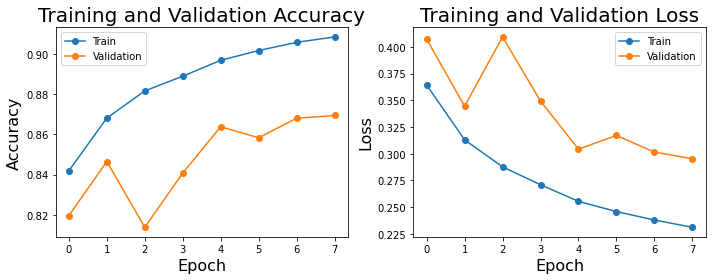

In [101]:
# Create subplots
plt.subplots(1, 2, figsize=(10, 4))

# Plot accuracies for train and validation sets
plt.subplot(1, 2, 1)
plt.plot(hist_df['accuracy'], label='Train', marker='o')
plt.plot(hist_df['val_accuracy'], label='Validation', marker='o')
plt.title('Training and Validation Accuracy', size=20)
plt.xlabel('Epoch', size=16)
plt.ylabel('Accuracy', size=16)
plt.legend()

# Plot losses
plt.subplot(1, 2, 2)
plt.plot(hist_df['loss'], label='Train', marker='o')
plt.plot(hist_df['val_loss'], label='Validation', marker='o')
plt.title('Training and Validation Loss', size=20)
plt.xlabel('Epoch', size=16)
plt.ylabel('Loss', size=16)
plt.legend()

# This ensures the subplots do not overlap
plt.tight_layout()
plt.savefig('plots/cnn1_acc_loss_plot.png')
# Show the subplots
plt.show()

In [50]:
print("Test set accuracy is {0:.4f}".format(cnn.evaluate(test_pipeline, steps=128, verbose=0)[1]))

Test set accuracy is 0.8441


In [27]:
test_pipeline

<PrefetchDataset shapes: ((None, 96, 96, 3), (None, 2)), types: (tf.float32, tf.float32)>

In [28]:
%%time
y_proba = cnn.predict(test_pipeline)

CPU times: user 3min 37s, sys: 17.6 s, total: 3min 54s
Wall time: 40.2 s


In [29]:
y_proba.shape

(32768, 2)

In [30]:
y_proba

array([[0.8328406 , 0.16715938],
       [0.11837599, 0.881624  ],
       [0.7755397 , 0.2244603 ],
       ...,
       [0.00129417, 0.99870586],
       [0.00353872, 0.99646133],
       [0.9566493 , 0.0433507 ]], dtype=float32)

In [31]:
y_proba_class1 = np.array([i[1] for i in y_proba])
y_proba_class1

array([0.16715938, 0.881624  , 0.2244603 , ..., 0.99870586, 0.99646133,
       0.0433507 ], dtype=float32)

In [32]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [33]:
pcam['test']

<PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>

In [34]:
test_iterator = pcam['test'].__iter__()

In [63]:
%%time
# Re-initialize iterator so it starts from the beginning
test_iterator = pcam['test'].__iter__()

# Create an empty list to store the test labels
test_labels = []

# There are 32768 images in the test set
for i in range(32768):
    test_labels.append(int(test_iterator.get_next()['label']))

test_labels = np.array(test_labels)
test_labels.mean()

CPU times: user 23.2 s, sys: 2.82 s, total: 26 s
Wall time: 5.61 s


0.499786376953125

In [64]:
%%time
# Re-initialize iterator so it starts from the beginning
train_iterator = pcam['train'].__iter__()

# Create an empty list to store the test labels
train_labels = []

# There are 32768 images in the test set
for i in range(32768):
    train_labels.append(int(train_iterator.get_next()['label']))

train_labels = np.array(train_labels)
train_labels.mean()

CPU times: user 22.8 s, sys: 3.09 s, total: 25.9 s
Wall time: 5.37 s


0.5057373046875

In [65]:
%%time
# Re-initialize iterator so it starts from the beginning
validation_iterator = pcam['validation'].__iter__()

# Create an empty list to store the test labels
validation_labels = []

# There are 32768 images in the test set
for i in range(32768):
    validation_labels.append(int(validation_iterator.get_next()['label']))

validation_labels = np.array(validation_labels)
validation_labels.mean()

CPU times: user 22.2 s, sys: 2.57 s, total: 24.7 s
Wall time: 5.24 s


0.499542236328125

In [36]:
test_labels.shape

(32768,)

In [60]:
test_labels[0]

0

In [39]:
report = classification_report(y_true=test_labels, y_pred=predictions, digits=4, output_dict=True)
report['1']['recall']

0.9532270867680284

In [40]:
print(classification_report(test_labels, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8211    0.8812    0.8501     16391
           1     0.8717    0.8078    0.8386     16377

    accuracy                         0.8445     32768
   macro avg     0.8464    0.8445    0.8443     32768
weighted avg     0.8464    0.8445    0.8443     32768



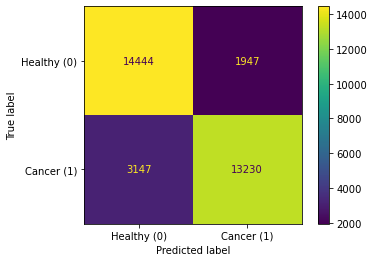

In [77]:
cf_matrix = confusion_matrix(test_labels, y_pred)
cf_matrix_norm = cf_matrix / cf_matrix.sum(axis=1)

ConfusionMatrixDisplay(cf_matrix, display_labels=['Healthy (0)', 'Cancer (1)']).plot()
plt.savefig('plots/cnn1_cf_matrix.png')

plt.show()

In [55]:
predictions = np.where(y_proba_class1 >= 0.125, 1, 0)
predictions

array([1, 1, 1, ..., 1, 1, 0])

In [56]:
print(classification_report(y_true=test_labels, y_pred=predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9286    0.6074    0.7344     16391
           1     0.7081    0.9532    0.8126     16377

    accuracy                         0.7802     32768
   macro avg     0.8183    0.7803    0.7735     32768
weighted avg     0.8184    0.7802    0.7735     32768



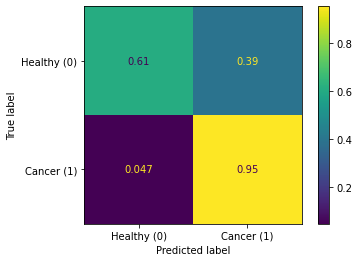

In [57]:
cf_matrix = confusion_matrix(test_labels, predictions)
cf_matrix_norm = cf_matrix / cf_matrix.sum(axis=1)

ConfusionMatrixDisplay(cf_matrix_norm, display_labels=['Healthy (0)', 'Cancer (1)']).plot()
plt.savefig('plots/cnn1_cf_matrix2.png')

plt.show()

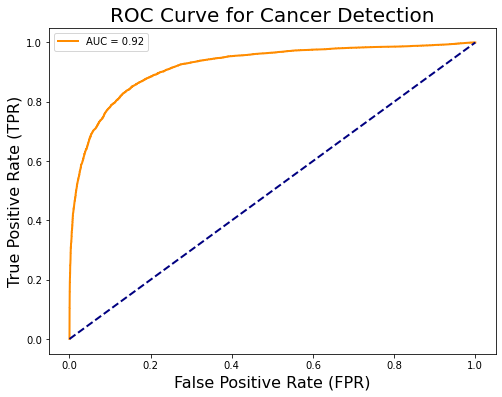

Area under curve (AUC):0.9207252156568154



In [44]:
fprs, tprs, thresholds = roc_curve(test_labels, y_proba_class1)
roc_auc = roc_auc_score(test_labels, y_proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)', size=16)
plt.ylabel('True Positive Rate (TPR)', size=16)
plt.title('ROC Curve for Cancer Detection', size=20)
plt.legend(loc="best")

plt.savefig('plots/cnn1_roc.png')

plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

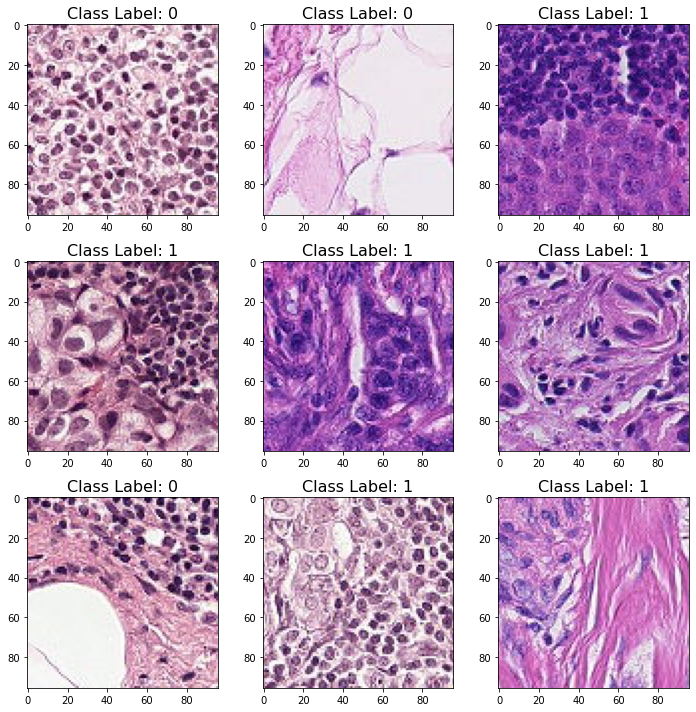

In [89]:
train_iterator = pcam['train'].__iter__()

plt.subplots(3, 3, figsize=(10,10))

for i in range(9):
    
    plt.subplot(3, 3, i+1)
    
    train_image = train_iterator.get_next()

    image = train_image['image']
    label = int(train_image['label'])
    
    plt.imshow(train_image['image'])
    plt.title('Class Label: '+ str(label), size=16)
    
    # Create a Rectangle patch
#     rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

#     # Add the patch to the Axes
#     ax.add_patch(rect)

plt.tight_layout()
plt.savefig('plots/example_images.png')
plt.show()

4
8
10
12
14
15
26
28
44


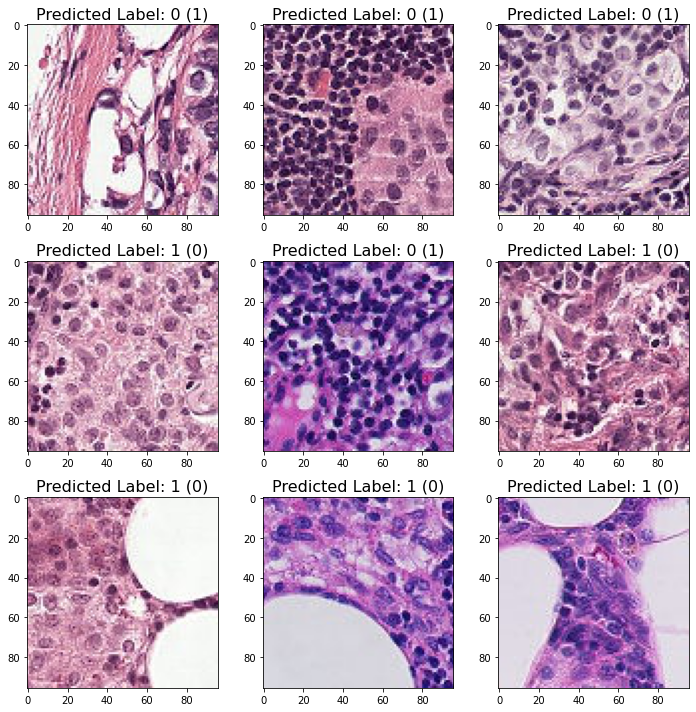

In [100]:
test_iterator = pcam['test'].__iter__()
i = 0
j = 0

plt.subplots(3, 3, figsize=(10,10))

while True:
    next_image = test_iterator.get_next()
    
    image = next_image['image']
    label = int(next_image['label'])
    
    # If the image was misclassified
    if test_labels[i] != y_pred[i]:
        print(i)
        
        plt.subplot(3, 3, j+1)

        plt.imshow(image)
        
        title = f'Predicted Label: {str(y_pred[i])} ({str(label)})'
        plt.title(title, size=16)
        
        j += 1
        
    # Stop the loop after 9 images are plotted
    if j == 9:
        break
    
    i += 1

plt.tight_layout()
plt.savefig('plots/cnn1_misclassified_images.png')
plt.show()

In [98]:
test_labels[8]

1

In [99]:
y_pred[10]

0